

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project 

#### Michael J Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


## Bagging with Non-Tree Base Models 

#### Deena Elhossary
#### Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The University of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### Executive Summary
The main objective of this project is to investigate the potential of bagging ensemble techniques to enhance the performance of non-tree-based machine learning models, such as support vector regression (SVR), linear regression, K-nearest neighbors (KNN) and logistic regression. Bagging is usually used with high-variance models like decision trees, but its effectiveness on more stable models remains relatively unexplored. To investigate this, we applied bagging to various non-tree models using Dr. Michael Pyrcz’s “unconv_MV.csv” dataset, while incorporating hyperparameter tuning to comprehensively evaluate model performance. Results indicate that bagging can significantly improve prediction accuracy and reduce variance, particularly for SVR under well-optimized configurations. We recommend applying bagging for non-tree models in scenarios where the model stability and prediction confidence are difficult to achieve, especially when working with limited or noisy datasets.

### What is Bagging?
**Bagging** (short for *Bootstrap Aggregating*) is an ensemble learning method used to improve model stability and accuracy by reducing variance. It involves the following:
1. **Sampling**: Multiple subsets are created from the original training dataset through random sampling with replacement (bootstrap sampling). This means that each bootstrap sample may contain duplicate entries and some data points may be left out (out-of-bag).

2. **Model Training**: A separate model (often referred to as a base or weak learner) is trained independently on each bootstrap sample. Common choices for base learners include decision trees, but bagging can be applied to other models as well.

3. **Aggregating Predictions**: The final prediction is made by combining individual model outputs. For regression, predictions are typically averaged, while for classification, majority voting is used.

### Key Benefits of Bagging

- By averaging the predictions of multiple models, bagging **reduces the variance** associated with individual models, making the general prediction more stable and less sensitive to fluctuations in the training data.

- Since each model sees a different subset of the data, bagging **helps prevent overfitting**, especially for models prone to high variance, such as decision trees.

- It also **improves the accuracy and robustness** of the model. Aggregating the outputs of multiple models leads to better predictive performance than using a single model.

### Project Objective

While bagging is widely known for improving decision tree models, this project aims to extend its use to more stable learners. **This project investigates the effectiveness of bagging (bootstrap aggregating) in improving accuracy and reducing variance when applied to various non-tree models including Linear, K-Nearest Neighbors, Support Vector, and Logistic Regression**.


### Import Packages
The packages used in this workflow along with their purpose are listed below:

In [61]:
import pandas as pd  # Dataset handling and manipulation
import numpy as np  # Numerical operations and arrays
import matplotlib.pyplot as plt  # Basic plotting
from matplotlib.colors import ListedColormap
import seaborn as sns  # Advanced plotting
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing
from sklearn.linear_model import LinearRegression, LogisticRegression  # Linear and logistic regression models
from sklearn.neighbors import KNeighborsRegressor  # KNN regression model
from sklearn.ensemble import BaggingRegressor, BaggingClassifier  # Bagging ensemble models for regression and classification
from sklearn.svm import SVR, SVC  # Support Vector Machines for regression and classification
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, mean_absolute_error, r2_score  # Model evaluation metrics
from sklearn.preprocessing import StandardScaler  # Feature standardization
from skopt import BayesSearchCV  # Bayesian hyperparameter optimization
from skopt.space import Real  # Real-valued search space for Bayesian optimization
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score
import warnings  # Handling warnings
from scipy import stats   # summary statistics
import numpy.linalg as linalg       
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

### Functions

The following functions will be used in the workflow. The purpose of each function is also provided.

In [62]:
def add_grid():                                            # adds gridlines to plots for better visualization
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
def plot_corr(corr_matrix,title,limits,mask):             # plots a graphical correlation matrix 
    my_colormap = plt.cm.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white            # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])

### Load Data

The following workflow uses the multivariate spatial dataset 'unconv_MV.csv'. The dataset is publicly available in Dr. Michael Pyrcz's GitHub repository.

We will work with the following features:

* **Porosity (%)** - Fraction of rock volume that is void (pore space)
* **Permeability (mD)** - Ability of a fluid to flow through the rock, measured in milliDarcy
* **Acoustic Impedance** - product of sonic velocity and rock density in units of $kg/m^2s*10^3$
* **Brittleness (%)** - A measure of the rock's tendency to fracture
* **Total Organic Carbon (%)** -  Amount of organic matter in the rock, indicating hydrocarbon generation potential
* **Vitrinite Reflectance (%)** - Maturity indicator of organic material, key to evaluating thermal maturity of the source rock
* **Initial Gas Production (MCFPD)** -  Target variable representing the 90-day average initial gas production rate

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv') #load the comma delimited data file from Dr. Pyrcz's GeoDataSets GitHub repository
df.dropna(inplace=True)
df.head(n=10)

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285
7,8,14.15,1.23,2.53,39.43,0.79,1.54,1943.639213
8,9,16.18,1.34,3.45,45.79,0.56,1.95,3176.523611
9,10,20.51,2.48,2.78,28.99,1.78,2.24,2522.792318


### Workflow Overview

A summary of the workflow used for this project is provided below:

1. **Data preparation and analysis**
2. **Feature engineering and scaling**
3. **Split dataset into training and testing**
4. **Develop and train non-tree base models (Linear, KNN, SVR and Logistic Regression)**
5. **Evaluate and compare the performance of base models**
6. **Apply bagging to base models (Linear, KNN, SVR and Logistic Regression)**
7. **Visualize performance improvements with Bagging for each model**
8. **Summarize and compare results across different model types**


### Step 1. Data Preparation and Analysis

This step involves extracting predictor and response features from the dataset. A summary of the sample statistics is also provided. Multivariate analysis is conducted to determine the relationship between different features. Pair grids of histograms, scatter plots, and Kernel Density Estimation (KDE) contour maps were generated to showcase these bivariate relationships. A correlation matrix was also used to obtain a quantitative overview of the linear relationships between all pairs of predictor features and response feature. The last column of the matrix indicates the extent of the linear association of the predictor features with the response feature production which informs feature ranking.

- **Histograms** are used to examine the probability distribution of each feature. These plots help identify skewness, multimodality, or outliers in the data, and guide feature transformations or model selection.

- **Scatter plots** help detect linear trends, clusters, or outliers between features. They are also useful for understanding correlation and redundancy of the features.
  
- **KDE contour maps** give a smooth estimate of joint probability density. They illustrate how dense or sparse the feature interactions are. They are useful for detecting nonlinear relationships that are not captured by scatter plots.

- **Correlation matrix** illustrates the strength and direction of the linear relationship between features. Values range from -1 (strong negative correlation) to +1 (strong positive correlation). Values near zero indicate weak or no linear relationship. It also helps detect redundant or collinear features.

In [64]:
# Extracting features from dataset
predictor_features= ['Por', 'LogPerm', 'AI', 'Brittle','TOC', 'VR'] # predictor features
response_feature = 'Production' # response feature

# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WellIndex,1000.0,500.500000,288.819436,1.000000,250.75000,500.50000,750.250000,1000.00000
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


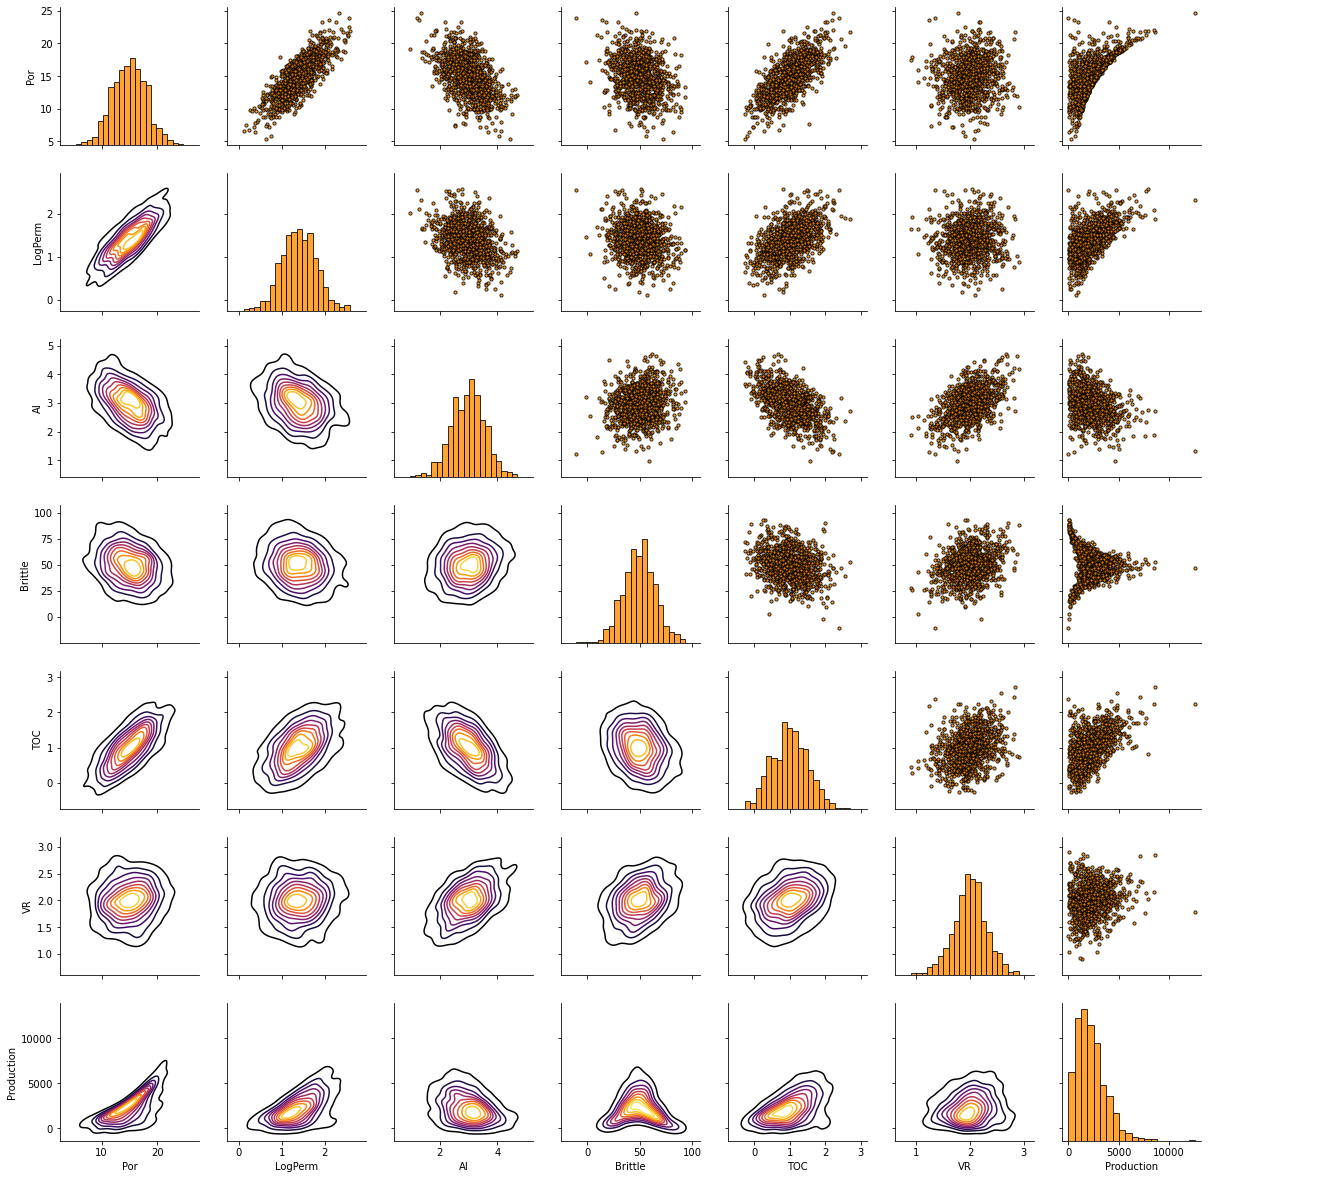

In [65]:
# Pair grids 
Xname = predictor_features
yname = response_feature
pairgrid = sns.PairGrid(df, vars=Xname + [yname])
pairgrid = pairgrid.map_upper(plt.scatter, color='darkorange', edgecolor='black', alpha=0.8, s=10)
pairgrid = pairgrid.map_diag(plt.hist, bins=20, color='darkorange', alpha=0.8, edgecolor='k')
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap=plt.cm.inferno, alpha=1.0, n_levels=10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()

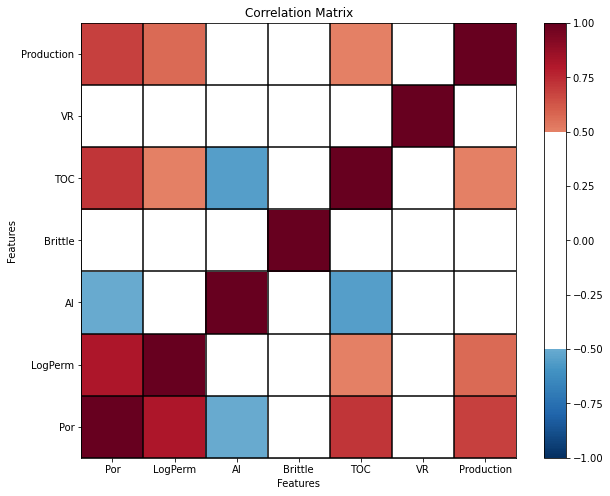

In [66]:
# Correlation matrix generated using Dr. Michael Pyrcz's custom function
correlation = df.iloc[:,1:8].corr().iloc[6,:6]                # calculate correlation matrix and slice for only pred - resp
corr_matrix = df.iloc[:,1:8].corr()
plt.figure(figsize=(10, 8))
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.5)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features');

### Comments
- Based on the pair grids, the curved or scattered trend for porosity, log perm and other features indicates potential nonlinear relationships with production.
- Based on the correlation matrix, porosity, permeability, TOC and are strongly positively correlated with production whereas AI is negatively correlated to it.

### Step 2. Feature Engineering and Scaling  
We define two variables for the baseline models: X (predictor features) and Y (response feature). We also set up a binary classification label for high vs. low production by thresholding at the median. This enables testing logistic regression and bagging in a classification setting. We then standardize our predictor features using the StandardScaler Function. StandardScaler is used to ensure fair treatment across models, particularly for distance- and margin-based methods (KNN and SVR).

In [67]:
# Feature Engineering
X = df[predictor_features]
df['High_Production'] = (df[response_feature] > df[response_feature].median()).astype(int) # Setting the categories for production for logistic regression
y_reg = df[response_feature]
y_cls = df['High_Production']

# Feature Scaling/Transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3. Split Dataset into Training and testing 
After feature engineering and transformation, we split the dataset into training (80%) and testing (20%). This ratio is commonly used when data volume is moderate like in this case. Using 80% of the data for training is sufficient for the model to learn robust patterns while minimizing overfit. Withholding 20% of the data, ensures there is sufficient data unseen by the model to fairly evaluate its performance and new predictions.

In [68]:
X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X_scaled, y_reg, y_cls, test_size=0.2, random_state=42)

### Step 4. Develop and Train Non-Tree Base Models
Four different non-tree base models were trained prior to investigating the effect of bagging: 
- **Linear Regression**: simple and fast baseline model that assumes linear relationship between predictor features and response. It provides a benchmark for evaluating whether more complex models offer meaningful performance gains.
- **K-Nearest Neighbors (KNN)**: non-parametric model that detects nonlinear patterns by averaging over local neighbors.
- **Logistic Regression**: linear classifier for defined binary production labeling.  It offers a fast, interpretable method for binary classification, suitable as a baseline before trying more complex classifiers.
- **Support Vector Regression (SVR)**: Models nonlinear relationships using kernel functions, to reduce high-dimensional feature spaces.

This diverse mix of base models helps evaluate the benefits of bagging across model types. I expect linear regression to underfit, KNN to possibly overfit, and SVR to benefit from optimization.

In [69]:
# Linear Regression
linear_model = LinearRegression() 
linear_model.fit(X_train, y_reg_train)
y_pred_linear = linear_model.predict(X_test)
# goodness of fit metrics
mse_linear = mean_squared_error(y_reg_test, y_pred_linear) # calculate mean squared error
r2_linear = r2_score(y_reg_test, y_pred_linear)  # calculate coefficient of determination
print(f"Linear Regression - MSE: {mse_linear:.4f}, R2 Score: {r2_linear:.4f}")

Linear Regression - MSE: 961137.9289, R2 Score: 0.4964


In [70]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5) # K = 5 gives a reasonable balance of flexibility and stability
knn_model.fit(X_train, y_reg_train)
y_pred_knn = knn_model.predict(X_test)
# goodness of fit metrics
mse_knn = mean_squared_error(y_reg_test, y_pred_knn)# calculate mean squared error
r2_knn = r2_score(y_reg_test, y_pred_knn) # calculate coefficient of determination
print(f"KNN Regression - MSE: {mse_knn:.4f}, R2 Score: {r2_knn:.4f}")

KNN Regression - MSE: 227349.3967, R2 Score: 0.8809


In [71]:
# Logistic Regression (Simple classification problem)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_cls_train)
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_cls_test, y_pred_logistic) # good general-purpose metric when classes are balanced
f1_logistic = f1_score(y_cls_test, y_pred_logistic) # balances precision and recall
print(f"Logistic Regression - Accuracy: {acc_logistic:.4f}, F1 Score: {f1_logistic:.4f}")

Logistic Regression - Accuracy: 0.7900, F1 Score: 0.7766


In [72]:
# Support Vector Regression (without optimization of hyperparameters)
svr_unopt = SVR(kernel='rbf') # Use default SVR settings for comparison
svr_unopt.fit(X_train, y_reg_train)
y_pred_svr = svr_unopt.predict(X_test)
# goodness of fit metrics
mse_svr = mean_squared_error(y_reg_test, y_pred_svr)
r2_svr = r2_score(y_reg_test, y_pred_svr)
print(f"SVR (Default) - MSE: {mse_svr:.4f}, R2 Score: {r2_svr:.4f}")

SVR (Default) - MSE: 1815347.6724, R2 Score: 0.0487


In [73]:
# Support Vector Regression with Bayesian Optimization for Hyperparameter Tuning
param_grid = {'C': Real(0.1, 1000, prior='log-uniform'),'epsilon': Real(0.001, 1, prior='log-uniform'),'gamma': Real(0.0001, 1, prior='log-uniform')}
svr = SVR(kernel='rbf')
bayes_search = BayesSearchCV(svr, param_grid, n_iter=30, cv=5, scoring='neg_mean_absolute_error', random_state=42)
bayes_search.fit(X_train, y_reg_train)
best_svr = bayes_search.best_estimator_
print(f"Best SVR Hyperparameters: {bayes_search.best_params_}")

Best SVR Hyperparameters: OrderedDict([('C', 1000.0), ('epsilon', 1.0), ('gamma', 0.22786046980452274)])


### Comments
- SVR (optimized) performs best followed by KNN then Linear Regression. It has the Lowest MSE which means smaller average squared errors, and highest R² which means it explains more of the variance in production.
- F1 and Accuracy are very close, which indicates that the logistic regression model is doing a good job at identifying both classes.

### Step 5. Evaluate and Compare Performance of Base Models (Linear, KNN, SVR and Logistic Regression)

We plot the predictions versus the actual data for each base model in order to see which one fits the data best. The **MSE and R2 scores were computed for the regression models (Linear, KNN,and SVR)** to evaluate their accuracy and goodness-of-fit. Meanwhile, for the **classification model (logistic regression), the accuracy, precision, recall and f1 score were computed and the confusion matrix** was visualized.

- **Mean Squared Error (MSE)** is the average of the squared differences between predicted and actual values. Lower MSE indicates higher predictive accuracy. However, it is sensitive to large errors due to squaring.
- **Coefficient of Determination (R2)** measures the proportion of variance in the response feature that is explained by the model. It ranges from 0 to 1, with R2 closer to 1 indicating a better fit.
- **Accuracy** is the ratio of correctly predicted labels to total predictions. High accuracy means the model classifies most data points correctly.
- **F1 score** is the harmonic mean of precision and recall. It balances false positives and false negatives. 
- **Precision** is the ratio of true positives to all positive predictions (True and false ones). It basically measures how many of the predicted positives are actually correct.
- **Recall** is the ratio of true positives to all outcomes/predictions. It basically measures how many of the actual positives the model correctly identified.
- **Confusion matrix** is a table showing true positives, true negatives, false positives, and false negatives. It helps visualize misclassifications and calculate accuracy, precision, recall, and F1.
 

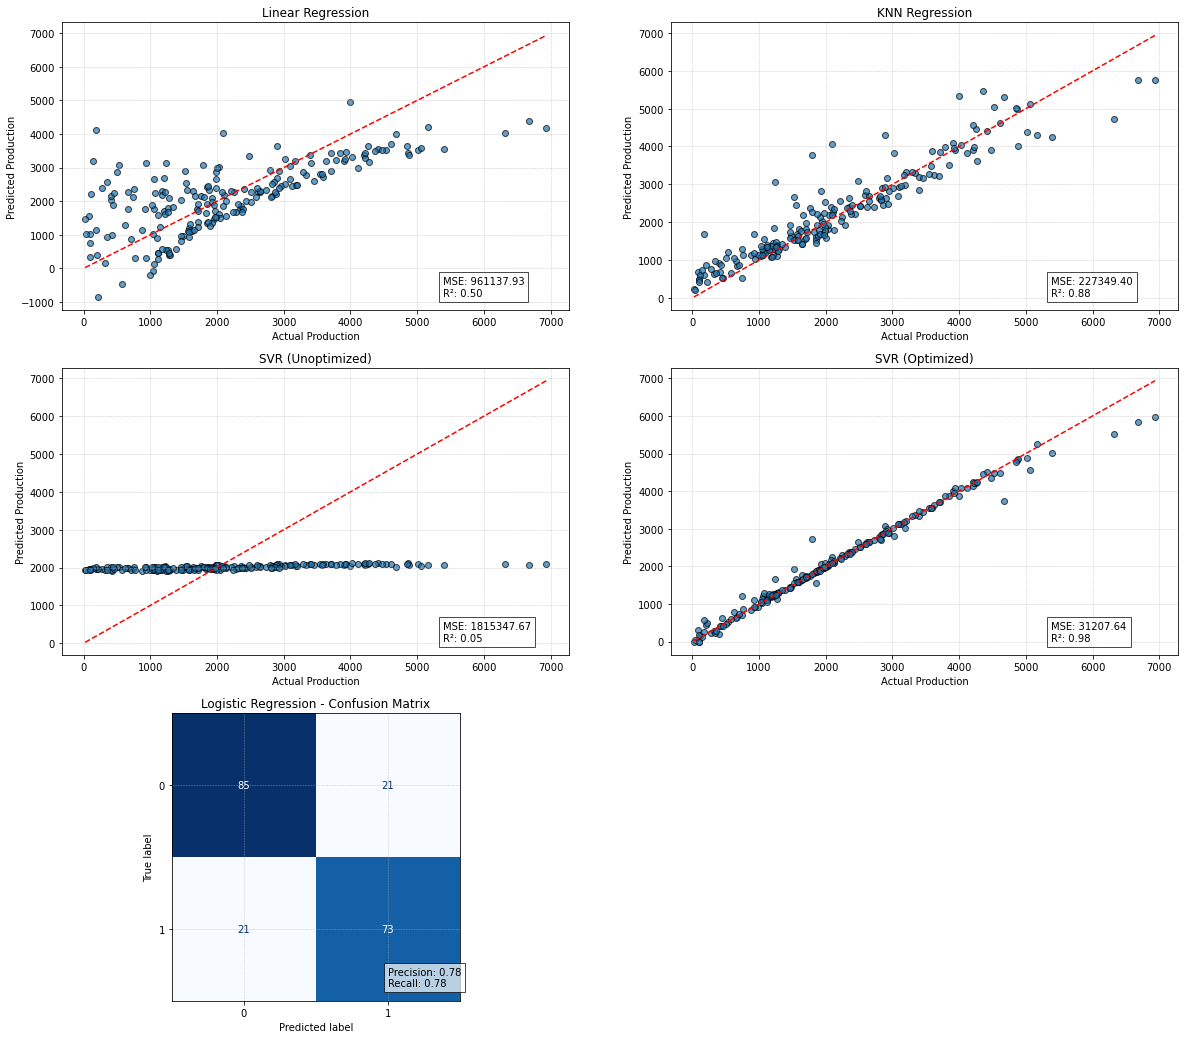

In [74]:
# Plots of predictions vs actual data for each base model
plt.figure(figsize=(20, 18))

# Linear Regression
plt.subplot(3, 2, 1)
plt.scatter(y_reg_test, y_pred_linear, edgecolor='black', alpha=0.7)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--')
plt.title("Linear Regression")
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.text(0.75, 0.05, f"MSE: {mse_linear:.2f}\nR²: {r2_linear:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
add_grid()

# KNN Regression
plt.subplot(3, 2, 2)
plt.scatter(y_reg_test, y_pred_knn, edgecolor='black', alpha=0.7)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--')
plt.title("KNN Regression")
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.text(0.75, 0.05, f"MSE: {mse_knn:.2f}\nR²: {r2_knn:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
add_grid()

# SVR (Unoptimized)
plt.subplot(3, 2, 3)
y_pred_svr_unopt = svr_unopt.predict(X_test)
mse_svr = mean_squared_error(y_reg_test, y_pred_svr_unopt)
r2_svr = r2_score(y_reg_test, y_pred_svr_unopt)
plt.scatter(y_reg_test, y_pred_svr_unopt, edgecolor='black', alpha=0.7)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--')
plt.title("SVR (Unoptimized)")
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.text(0.75, 0.05, f"MSE: {mse_svr:.2f}\nR²: {r2_svr:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
add_grid()

# SVR after Bayesian Optimization
plt.subplot(3, 2, 4)
y_pred_svr = best_svr.predict(X_test)
mse_svr_opt = mean_squared_error(y_reg_test, y_pred_svr)
r2_svr_opt = r2_score(y_reg_test, y_pred_svr)
plt.scatter(y_reg_test, y_pred_svr, edgecolor='black', alpha=0.7)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--')
plt.title("SVR (Optimized)")
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.text(0.75, 0.05, f"MSE: {mse_svr_opt:.2f}\nR²: {r2_svr_opt:.2f}",  transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
add_grid()

# Logistic Regression
plt.subplot(3, 2, 5)
cm = confusion_matrix(y_cls_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(ax=plt.gca(), cmap='Blues', colorbar=False)
plt.title("Logistic Regression - Confusion Matrix")
precision = precision_score(y_cls_test, y_pred_logistic) # Compute precision recall, accuracy and f1 for baseline logistic regression
recall = recall_score(y_cls_test, y_pred_logistic)
acc_logistic = accuracy_score(y_cls_test, y_pred_logistic) 
f1_logistic = f1_score(y_cls_test, y_pred_logistic)
plt.text(0.75, 0.05, f"Precision: {precision:.2f}\nRecall: {recall:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
add_grid()

### Step 6. Apply Bagging to Base Models (Linear, KNN, SVR and Logistic Regression)
**Bagging** builds an ensemble by training multiple models on random resampled versions of the training data. This **reduces model variance** and helps **stabilize high-variance learners like KNN and SVR**. I applied **bagging regressor or classifier** to each base model using **10 to 200 estimators** to measure how performance improves with ensemble size.

In [75]:
# Bagging with different numbers of estimators
estimators_range = range(10, 201, 20)

# Store results for comparison 
results = {'LinearRegression': [],'KNN': [],'LogisticRegression': [],'SVR_Optimized': [],'SVR_Unoptimized': []}

# Loop over different ensemble sizes
for n in estimators_range:
    # Bagging for Linear Regression
    bag_lr = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=n, random_state=42)
    bag_lr.fit(X_train, y_reg_train)
    y_pred_lr = bag_lr.predict(X_test)
    mse_lr = mean_squared_error(y_reg_test, y_pred_lr)
    r2_lr = r2_score(y_reg_test, y_pred_lr)
    results['LinearRegression'].append((mse_lr, r2_lr))

    # Bagging for KNN
    bag_knn = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5), n_estimators=n, random_state=42)
    bag_knn.fit(X_train, y_reg_train)
    y_pred_knn = bag_knn.predict(X_test)
    mse_knn = mean_squared_error(y_reg_test, y_pred_knn)
    r2_knn = r2_score(y_reg_test, y_pred_knn)
    results['KNN'].append((mse_knn, r2_knn))

    # Bagging for Logistic Regression (classification)
    bag_logr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=n, random_state=42)
    bag_logr.fit(X_train, y_cls_train)
    y_pred_logr = bag_logr.predict(X_test)
    acc = accuracy_score(y_cls_test, y_pred_logr)
    f1 = f1_score(y_cls_test, y_pred_logr)
    results['LogisticRegression'].append((acc, f1))

    # Bagging for Unoptimized SVR
    bag_svr_unopt = BaggingRegressor(base_estimator=svr_unopt, n_estimators=n, random_state=42)
    bag_svr_unopt.fit(X_train, y_reg_train)
    y_pred_svr_unopt = bag_svr_unopt.predict(X_test)
    mse_svr_unopt = mean_squared_error(y_reg_test, y_pred_svr_unopt)
    r2_svr_unopt = r2_score(y_reg_test, y_pred_svr_unopt)
    results['SVR_Unoptimized'].append((mse_svr_unopt, r2_svr_unopt))

    # Bagging for Optimized SVR
    bag_svr_opt = BaggingRegressor(base_estimator=best_svr, n_estimators=n, random_state=42)
    bag_svr_opt.fit(X_train, y_reg_train)
    y_pred_svr_opt = bag_svr_opt.predict(X_test)
    mse_svr_opt = mean_squared_error(y_reg_test, y_pred_svr_opt)
    r2_svr_opt = r2_score(y_reg_test, y_pred_svr_opt)
    results['SVR_Optimized'].append((mse_svr_opt, r2_svr_opt))


### Step 7. Visualize Performance Improvements with Bagging
We compare the performance of baseline models to the bagged ones using the following metrics:
- **MSE for regression**
- **Accuracy and F1 for classification**

The plots shown below help quantify the effect of bagging on each model type.


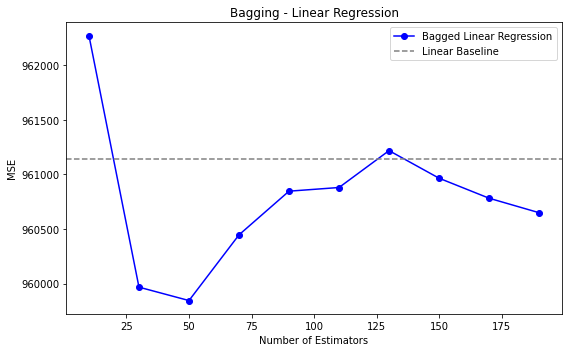

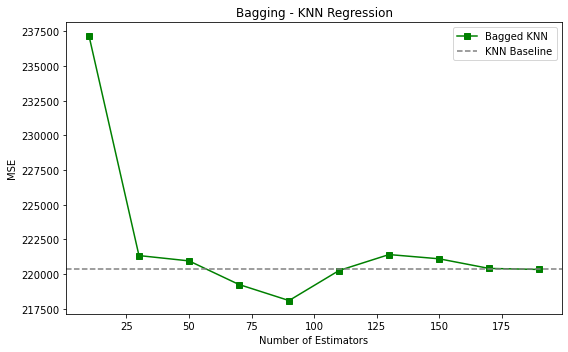

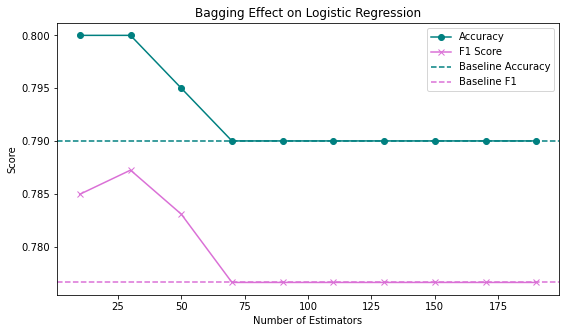

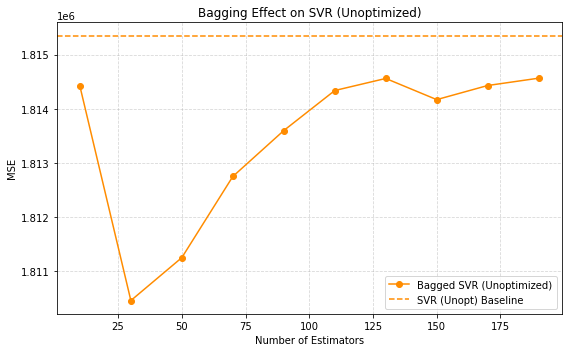

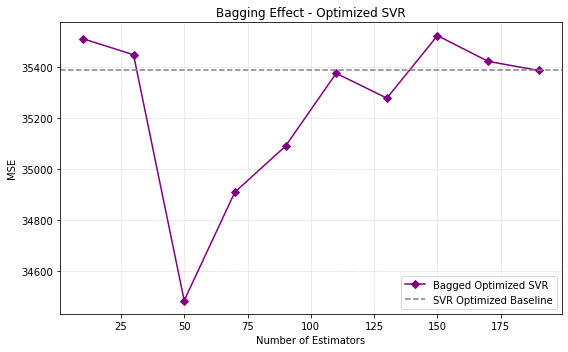

In [76]:
# Plot performance improvements with bagging (MSE only)

# Extract MSE values from tuple results
mse_lr_bagged = [mse for mse, _ in results['LinearRegression']]
mse_knn_bagged = [mse for mse, _ in results['KNN']]
mse_svr_unopt_bagged = [mse for mse, _ in results['SVR_Unoptimized']]
mse_svr_opt_bagged = [mse for mse, _ in results['SVR_Optimized']]

# Bagging Effect on Linear Regression
plt.figure(figsize=(8, 5))
plt.plot(estimators_range, mse_lr_bagged, label='Bagged Linear Regression', marker='o', color='blue')
plt.axhline(mse_linear, linestyle='--', color='gray', label='Linear Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('Bagging - Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Bagging Effect on KNN Regression
plt.figure(figsize=(8, 5))
plt.plot(estimators_range, mse_knn_bagged, label='Bagged KNN', marker='s', color='green')
plt.axhline(mse_knn, linestyle='--', color='gray', label='KNN Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('Bagging - KNN Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Classification Accuracy & F1
accs = [acc for acc, f1 in results['LogisticRegression']]
f1s = [f1 for acc, f1 in results['LogisticRegression']]

plt.figure(figsize=(9, 5))
plt.plot(estimators_range, accs, label='Accuracy', marker='o', color='teal')
plt.plot(estimators_range, f1s, label='F1 Score', marker='x', color='orchid')
plt.axhline(acc_logistic, linestyle='--', color='teal', label='Baseline Accuracy')
plt.axhline(f1_logistic, linestyle='--', color='orchid', label='Baseline F1')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Bagging Effect on Logistic Regression')
plt.legend()
plt.show()

# Bagging Effect on SVR (Unoptimized)
plt.figure(figsize=(8, 5))
plt.plot(estimators_range, mse_svr_unopt_bagged, marker='o', color='darkorange', label='Bagged SVR (Unoptimized)')
plt.axhline(mse_svr, linestyle='--', color='darkorange', label='SVR (Unopt) Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('Bagging Effect on SVR (Unoptimized)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bagging Effect on SVR (Optimized)
plt.figure(figsize=(8, 5))
plt.plot(estimators_range, mse_svr_opt_bagged, label='Bagged Optimized SVR', marker='D', color='purple')
plt.axhline(mse_svr_opt, linestyle='--', color='gray', label='SVR Optimized Baseline')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('Bagging Effect - Optimized SVR')
plt.legend()
add_grid()
plt.tight_layout()
plt.show()


### Step 8. Summarize and Compare Results Across Different Regression Model Types
The table below summarizes and compares the results of baseline and bagged regression models in terms of MSE and R2. It also provides the best estimator number for bagging for each model.

In [77]:
# Summary Table of bagging results on regression models (MSE and R²)
summary_rows = []

# Baseline MSE and R² values
baseline_metrics = {'LinearRegression': (mse_linear, r2_linear),'KNN': (mse_knn, r2_knn),'SVR_Unoptimized': (mse_svr, r2_svr), 'SVR_Optimized': (mse_svr_opt, r2_svr_opt)}

# for loop structure
for model in ['LinearRegression', 'KNN', 'SVR_Unoptimized', 'SVR_Optimized']:
    model_results = results[model]

    # Get index of lowest MSE
    best_index = min(range(len(model_results)),key=lambda i: model_results[i][0] if isinstance(model_results[i], tuple) else model_results[i])

    # Extract best MSE and R²
    if isinstance(model_results[best_index], tuple):
        best_mse, best_r2 = model_results[best_index]
    else:
        best_mse = model_results[best_index]
        best_r2 = None

    best_n = list(estimators_range)[best_index]

    # Get baseline values
    baseline_mse_val, baseline_r2_val = baseline_metrics[model]

    summary_rows.append([model,baseline_mse_val, baseline_r2_val,best_mse, best_r2,best_n])

# Create and display DataFrame
summary_df = pd.DataFrame(summary_rows, columns=['Model', 'Baseline MSE', 'Baseline R²','Best Bagged MSE', 'Best Bagged R²', 'Best n_estimators'])

# Round numeric columns to 4 decimal places
summary_df[['Baseline MSE', 'Baseline R²', 'Best Bagged MSE', 'Best Bagged R²']] = summary_df[['Baseline MSE', 'Baseline R²', 'Best Bagged MSE', 'Best Bagged R²']].round(4)

summary_df


,Model,Baseline MSE,Baseline R²,Best Bagged MSE,Best Bagged R²,Best n_estimators
0,LinearRegression,9.611379e+05,0.4964,9.598458e+05,0.4970,50
1,KNN,2.203342e+05,0.8845,2.180905e+05,0.8857,90
2,SVR_Unoptimized,1.815348e+06,0.0487,1.810464e+06,0.0513,30
3,SVR_Optimized,3.538670e+04,0.9815,3.448384e+04,0.9819,50


### Results
-  **Linear Regression performed poorly as expected**, serving as a baseline (R² ≈ 0.50).
- **Support Vector Regression (SVR) showed poor performance using default hyperparameters** (R² ≈ 0.049), but significantly improved after Bayesian optimization (R² ≈ 0.98).
- **SVR with Bayesian optimization achieved the best overall performance among trained baseline models**, demonstrating the importance of hyperparameter tuning.
- **KNN Regression base model achieved good performance with an R² of ~0.88**, benefiting significantly from bagging, which further reduced its MSE.
- **Bagging improved performance and reduced prediction variance** for high-variance models (especially SVR and KNN), with the **best results achieved between 50–100 estimators**.
- **Logistic Regression used for classifying high vs. low production wells, achieved 79% accuracy and a strong F1 score (0.77)**. Bagging further improved classification stability.

### Conclusions
- Bagging improves the performance of even stable, non-tree base models like KNN and SVR, particularly when variance is high or models are sensitive to data fluctuations.
- Optimizing SVR hyperparameters using Bayesian search was essential to unlocking its potential as SVR with default hyperparameters underperformed significantly.
- The best performing model overall was Bagged Optimized SVR, showcasing that ensemble learning combined with kernel-based modeling and tuning yields strong generalization.


#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)